In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit as cf
from scipy.stats import chi2
from math import floor

In [2]:
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 4
mpl.rcParams['figure.autolayout'] = True
mpl.rcParams['font.size'] = 20
mpl.rcParams['errorbar.capsize'] = 3
mpl.rcParams['lines.markeredgewidth'] = 1

c_list = ['tab:orange','crimson','forestgreen','darkmagenta','lightseagreen']

In [3]:
def chi2_red_calc(y,y_err,x,func,popt):
    puntos = len(y)
    params = len(popt)
    grados_lib = puntos - params - 1
    y_ajuste = func(x,*popt)
    
    chi_cuadrado = np.sum(((y-y_ajuste)/y_err)**2)
    chi_reducido = chi_cuadrado/grados_lib
    p_chi = chi2.sf(chi_cuadrado,grados_lib)

#    print('chi^2: ' + str(chi_cuadrado))
    print('chi^2 reducido: ' + str(chi_reducido)) ## tiene sentido que sea <1, pero que el pvalue sea 1?
#    print('p-valor del chi^2: ' + str(p_chi))
#    
#    if y_err[0]==0:
#        print('No se declararon errores en la variable y.')
#    elif p_chi<0.05:
#        print('Se rechaza la hipótesis de que el modelo ajuste a los datos.')
#    else:
#        print('No se puede rechazar la hipótesis de que el modelo ajuste a los datos.')
    return chi_reducido

In [4]:
long_tot_1 = 2.997 # m
m_tot_1 = 0.001370 # kg
err_long_tot_1 = 0.0005 # m
err_m_tot_1 = 0.000005 # kg

rho_1 = m_tot_1/long_tot_1 # kg/m
err_rho_1 = np.sqrt((err_m_tot_1/long_tot_1)**2+(m_tot_1*err_long_tot_1/long_tot_1**2)**2) # k/m

print(f'La densidad de la primera cuerda es ({np.round(rho_1,6)} ± {np.round(err_rho_1,6)}) kg/m')

La densidad de la primera cuerda es (0.000457 ± 2e-06) kg/m


In [5]:
g = 9.79688 # m/s²

m_list_1 = np.array([0.1599,0.2599,0.2099,0.3099,0.3599]) #kg
err_m_list = 0.00005 # kg

T_1 = m_list_1*g
err_T_1 = err_m_list*g

L1 = 2.05 # m
print(T_1)

[1.56652111 2.54620911 2.05636511 3.03605311 3.52589711]


In [6]:
v1 = np.sqrt(T_1/rho_1)
print(v1)

[58.53979726 74.63286643 67.07075597 81.49627718 87.82494884]


In [7]:
hyp = lambda x,a : a/x
lineal = lambda x,a : a*x
dcmls = lambda x : -int(floor(np.log10(abs(x))))

chi^2 reducido: 62.62040632937067
La velocidad de propagación es (50.5047 ± 0.0004) m/s
chi^2 reducido: 1223.2557334908965
La velocidad de propagación es (63.8261 ± 0.0002) m/s
chi^2 reducido: 1471.6366574767092
La velocidad de propagación es (57.279 ± 0.0001) m/s
chi^2 reducido: 2298.359679497791
La velocidad de propagación es (69.6306 ± 0.0002) m/s
chi^2 reducido: 793.9926073870217
La velocidad de propagación es (75.3345 ± 0.0002) m/s
La densidad de la cuerda es (0.000624751332 ± 7e-12) kg/m
chi^2 reducido: 859387.8230772394
0.9994905305169186


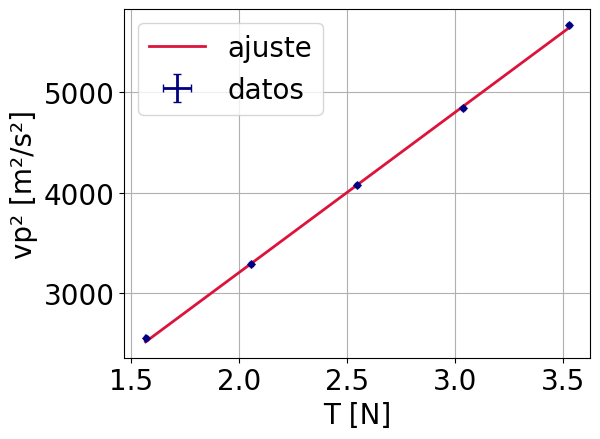

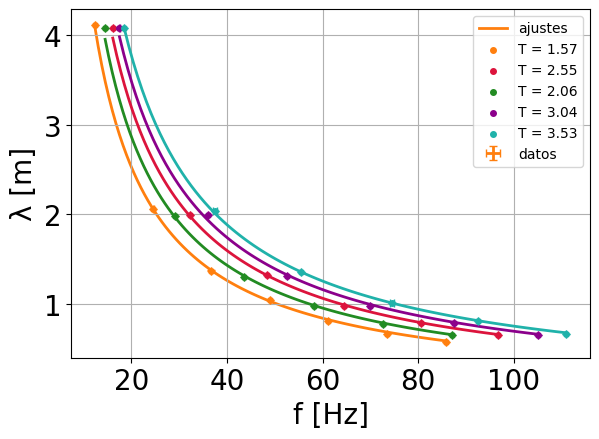

In [8]:
datas1 = []
fs1 = []
ferr1 = []
ds1 = []
derr1 = []
lambdas1 = []
err_lambdas1 = []
vp1 = []
err_vp1 = []
x_adj1=[]
y_adj1 = []

for i in range(1,6):
    datas1.append(np.loadtxt(f'frecuencias y largos/cuerda1_peso{i}.csv',delimiter=',',unpack=True,skiprows=1))
for i in range(len(datas1)):
    fs1.append(datas1[i][2])
    ferr1.append(datas1[i][3])
    ds1.append(datas1[i][4])
    derr1.append(datas1[i][5])
for i in range(len(ds1[0])):
    ds1[0][i] = ds1[0][i]*(i+1)
    derr1[0][i] = derr1[0][i]*(i+1)
for i in range(len(ds1)):
    lambdas1.append([])
    err_lambdas1.append([])
    for j in range(len(ds1[i])):
        lambdas1[i].append(ds1[i][j]*2/(j+1)/100)
        err_lambdas1[i].append(derr1[i][j]*2/(j+1)/100)
for i in range(len(lambdas1)):
    pars,cov = cf(hyp,fs1[i],lambdas1[i],sigma=err_lambdas1[i],absolute_sigma=True)
    vp1.append(pars[0])
    err_vp1.append(cov[0,0])
    x_adj1.append(np.linspace(min(fs1[i]),max(fs1[i]),100))
    y_adj1.append(hyp(x_adj1[i],vp1[i]))
    chi2_red_calc(lambdas1[i],err_lambdas1[i],fs1[i],hyp,pars)
    print(f'La velocidad de propagación es ({np.round(vp1[i],dcmls(err_vp1[i]))} ± {np.round(err_vp1[i],dcmls(err_vp1[i]))}) m/s')

pars,cov=cf(lineal,T_1,np.array(vp1)**2,sigma=2*np.array(vp1)*np.array(err_vp1),absolute_sigma=True)
u1 = 1/pars[0]
err_u1 = cov[0,0]/pars[0]**2
print(f'La densidad de la cuerda es ({np.round(u1,dcmls(err_u1))} ± {np.round(err_u1,dcmls(err_u1))}) kg/m')
T_adj1 = np.linspace(min(T_1),max(T_1),100)
vp_adj1 = lineal(T_adj1,*pars)
chi2_red_calc(np.array(vp1)**2,2*np.array(vp1)*np.array(err_vp1),T_1,lineal,pars)
r2_vp1 = 1 - (np.sum((np.array(vp1)**2-lineal(T_1,*pars))**2)/np.sum((np.array(vp1)**2 - np.mean(np.array(vp1)**2))**2))
print(r2_vp1)
plt.plot(T_adj1,vp_adj1,'crimson',zorder=2,label='ajuste')
plt.errorbar(T_1,np.array(vp1)**2,yerr=2*np.array(vp1)*np.array(err_vp1),xerr=np.ones_like(T_1)*err_T_1,fmt='none',ecolor='navy',zorder=3,label='datos')
plt.scatter(T_1,np.array(vp1)**2,c='navy',zorder=4)
plt.grid(zorder=1)
plt.xlabel('T [N]')
plt.ylabel('vp² [m²/s²]')
plt.legend()
plt.savefig('T_vp_1.png')
plt.show()

plt.errorbar(fs1[0],lambdas1[0],yerr=err_lambdas1[0],xerr=ferr1[0],fmt='none',ecolor=c_list[0],zorder=2,label='datos')
plt.plot(x_adj1[0],y_adj1[0],c=c_list[0],zorder=1,label='ajustes')
plt.scatter(fs1[0],lambdas1[0],c=c_list[0],zorder=3,label=f'T = {np.round(T_1[0],2)}')
for m in range(1,len(lambdas1)):
    plt.errorbar(fs1[m],lambdas1[m],yerr=err_lambdas1[m],xerr=ferr1[m],fmt='none',ecolor=c_list[m],zorder=3)
    plt.scatter(fs1[m],lambdas1[m],c=c_list[m],zorder=4,label=f'T = {np.round(T_1[m],2)}')
    plt.plot(x_adj1[m],y_adj1[m],c=c_list[m],zorder=2)
    plt.legend(fontsize=10)
plt.xlabel('f [Hz]')
plt.ylabel('\u03BB [m]')
plt.grid(zorder=1)
#plt.legend(fontsize=10)
plt.savefig('cuerda1.png')
plt.show()

In [9]:
long_tot_2 = 2.997 # m
m_tot_2 = 0.000181 # kg
err_long_tot_2 = 0.0005 # m
err_m_tot_2 = 0.000005 # kg

rho_2 = m_tot_2/long_tot_2 # kg/m
err_rho_2 = np.sqrt((err_m_tot_2/long_tot_2)**2+(m_tot_2*err_long_tot_2/long_tot_2**2)**2) # k/m

print(f'La densidad de la segunda cuerda es ({np.round(rho_2,6)} ± {np.round(err_rho_2,6)}) kg/m')

La densidad de la segunda cuerda es (6e-05 ± 2e-06) kg/m


In [10]:
m_list_2 = np.array([0.0599,0.0799,0.0999,0.1199,0.1399]) #kg
err_m_list = 0.00005 # kg

T_2 = m_list_2*g
err_T_2 = err_m_list*g

L1 = 2.05 # m
print(T_2)

[0.58683311 0.78277071 0.97870831 1.17464591 1.37058351]


chi^2 reducido: 123.16350121301936
La velocidad de propagación es (94.8173 ± 0.0004) m/s
chi^2 reducido: 844.8613666554146
La velocidad de propagación es (109.4179 ± 0.0005) m/s
chi^2 reducido: 153.22619865418983
La velocidad de propagación es (121.8112 ± 0.0006) m/s
chi^2 reducido: 218.0166972941671
La velocidad de propagación es (133.1361 ± 0.0007) m/s
chi^2 reducido: 465.2819225626979
La velocidad de propagación es (144.6754 ± 0.0008) m/s
5 5
La densidad de la cuerda es (6.562017e-05 ± 2e-11) kg/m
chi^2 reducido: 570135.1343698199
0.9995129313818202


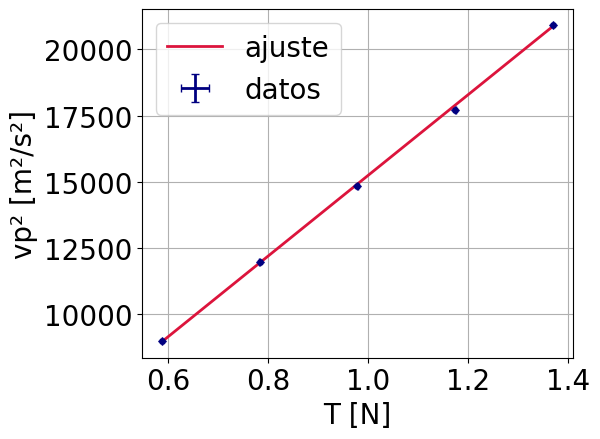

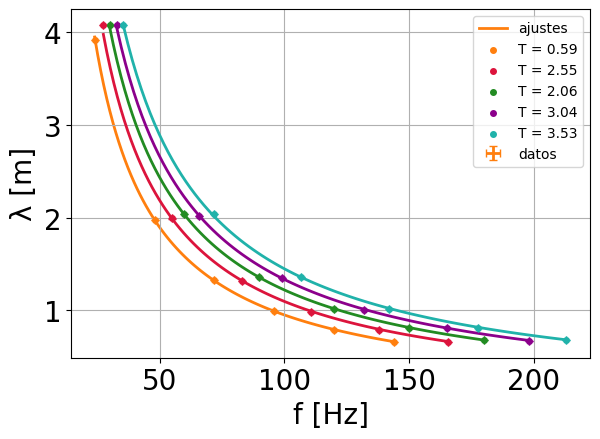

In [11]:
datas2 = []
fs2 = []
ferr2 = []
ds2 = []
derr2 = []
lambdas2 = []
err_lambdas2 = []
vp2 = []
err_vp2 = []
x_adj2 =[]
y_adj2 = []

for i in range(1,6):
    datas2.append(np.loadtxt(f'frecuencias y largos/cuerda2_peso{i}.csv',delimiter=',',unpack=True,skiprows=1))
for i in range(len(datas2)):
    fs2.append(datas2[i][2])
    ferr2.append(datas2[i][3])
    ds2.append(datas2[i][4])
    derr2.append(datas2[i][5])
for i in range(len(ds2)):
    lambdas2.append([])
    err_lambdas2.append([])
    for j in range(len(ds2[i])):
        lambdas2[i].append(ds2[i][j]*2/(j+1)/100)
        err_lambdas2[i].append(derr2[i][j]*2/(j+1)/100)
for i in range(len(lambdas2)):
    pars,cov = cf(hyp,fs2[i],lambdas2[i],sigma=err_lambdas2[i],absolute_sigma=True)
    vp2.append(pars[0])
    err_vp2.append(cov[0,0])
    x_adj2.append(np.linspace(min(fs2[i]),max(fs2[i]),100))
    y_adj2.append(hyp(x_adj2[i],vp2[i]))
    chi2_red_calc(lambdas2[i],err_lambdas2[i],fs2[i],hyp,pars)
    print(f'La velocidad de propagación es ({np.round(vp2[i],dcmls(err_vp2[i]))} ± {np.round(err_vp2[i],dcmls(err_vp2[i]))}) m/s')

print(len(vp2),len(err_vp2))

pars,cov=cf(lineal,T_2,np.array(vp2)**2,sigma=2*np.array(vp2)*np.array(err_vp2),absolute_sigma=True)
u2 = 1/pars[0]
err_u2 = cov[0,0]/pars[0]**2
print(f'La densidad de la cuerda es ({np.round(u2,dcmls(err_u2))} ± {np.round(err_u2,dcmls(err_u2))}) kg/m')
T_adj2 = np.linspace(min(T_2),max(T_2),100)
vp_adj2 = lineal(T_adj2,*pars)
chi2_red_calc(np.array(vp2)**2,2*np.array(vp2)*np.array(err_vp2),T_2,lineal,pars)
r2_vp2 = 1 - (np.sum((np.array(vp2)**2-lineal(T_2,*pars))**2)/np.sum((np.array(vp2)**2 - np.mean(np.array(vp2)**2))**2))
print(r2_vp2)
plt.plot(T_adj2,vp_adj2,'crimson',zorder=2,label='ajuste')
plt.errorbar(T_2,np.array(vp2)**2,yerr=2*np.array(vp2)*np.array(err_vp2),xerr=np.ones_like(T_2)*err_T_2,fmt='none',ecolor='navy',zorder=3,label='datos')
plt.scatter(T_2,np.array(vp2)**2,c='navy',zorder=4)
plt.grid(zorder=1)
plt.xlabel('T [N]')
plt.ylabel('vp² [m²/s²]')
plt.legend()
plt.savefig('T_vp_2.png')
plt.show()

plt.errorbar(fs2[0],lambdas2[0],yerr=err_lambdas2[0],xerr=ferr2[0],fmt='none',ecolor=c_list[0],zorder=2,label='datos')
plt.plot(x_adj2[0],y_adj2[0],c=c_list[0],zorder=1,label='ajustes')
plt.scatter(fs2[0],lambdas2[0],c=c_list[0],zorder=3,label=f'T = {np.round(T_2[0],2)}')
for m in range(1,len(lambdas2)):
    plt.errorbar(fs2[m],lambdas2[m],yerr=err_lambdas2[m],xerr=ferr2[m],fmt='none',ecolor=c_list[m],zorder=3)
    plt.scatter(fs2[m],lambdas2[m],c=c_list[m],zorder=4,label=f'T = {np.round(T_1[m],2)}')
    plt.plot(x_adj2[m],y_adj2[m],c=c_list[m],zorder=2)
    plt.legend(fontsize=10)
plt.xlabel('f [Hz]')
plt.ylabel('\u03BB [m]')
plt.grid(zorder=1)
plt.legend(fontsize=10)
plt.savefig('cuerda2.png')
plt.show()

In [20]:
m_tot_3 = 0.0000867 # kg
m_tot_4 = 0.001171 # kg
long_tot_3 =  1.372 # m
long_tot_4 = 2.42 # m

L_tot = 1.48 # m

m_t = 0.1099 # kg

rho_3 = m_tot_3/long_tot_3 # kg/m
err_rho_3 = np.sqrt((err_m_tot_1/long_tot_3)**2+(m_tot_3*err_long_tot_1/long_tot_3**2)**2) # k/m
rho_4 = m_tot_4/long_tot_4 # kg/m
err_rho_4 = np.sqrt((err_m_tot_1/long_tot_4)**2+(m_tot_4*err_long_tot_1/long_tot_4**2)**2) # k/m

print(f'La densidad de la tercera cuerda es ({np.round(rho_3,6)} ± {np.round(err_rho_3,6)}) kg/m')
print(f'La densidad de la cuarta cuerda es ({np.round(rho_4,6)} ± {np.round(err_rho_4,6)}) kg/m')

La densidad de la tercera cuerda es (6.3e-05 ± 4e-06) kg/m
La densidad de la cuarta cuerda es (0.000484 ± 2e-06) kg/m


In [25]:
T_4 = m_t*g
err_T_4 = err_m_list*g
T_3 = T_4

print(T_4)

v4 = np.sqrt(T_4/rho_4)
f4 = v4/2.218
v3 = np.sqrt(T_3/rho_3)
duda = v3/f4
print(duda)

print(f4)

print(f'la frecuencia de la primera cuerda es {f4}')

err_v3 = np.sqrt((T_3*rho_3)**(-1)*err_T_4**2+(T_3/rho_3**3)*err_rho_3**2)
err_f4 = np.sqrt((T_4*rho_4)**(-1)*err_T_4**2+(T_4/rho_4**3)*err_rho_4**2)/2.218
err_duda = np.sqrt((err_v3/f4)**2+(v3*err_f4/f4**2)**2)
print(err_duda)

1.076677112
6.137617413220842
21.26720581945126
la frecuencia de la primera cuerda es 21.26720581945126
0.35495729370380186


In [26]:
L = 0.9
a = 0.031
L_ef = L + 0.3*a
err_L = 0.01
err_a = 0.001
err_L_ef = np.sqrt(err_L**2+(0.3*err_a)*2)
print(L_ef,err_L_ef)

0.9093 0.026457513110645904
